> # **Unsupervised Learning and Preprocessing**

In this lesson we start discussing unsupervised learning algorithms: there is no known output now, no teacher to instruct the learning algorithm. *In unsupervised learning, the learning algorithm is just shown the input data and asked to extract knowledge from this data.*

There are two kinds of unsupervised learning: **(i) transformations of the dataset** and **(ii) clustering**.

**Unsupervised transformations of a dataset** are algorithms that create a new representation of the data which might be easier for humans or other machine learning algorithms to understand compared to the original representation of the data. A common application of unsupervised transformations is **dimensionality reduction**, which takes a high-dimensional representation of the data, consisting of many features, and finds a new way to represent this data that summarizes the essential characteristics with fewer features. ***A common application for dimensionality reduction*** is reduction to two dimensions for visualization purposes.

**Clustering algorithms**, on the other hand, partition data into distinct groups of similar items. Consider the example of uploading photos to a social media site. To allow you to organize your pictures, the site might want to group together pictures that show the same person. However, the site doesn’t know which pictures show whom, and it doesn’t know how many different people appear in your photo collection. A sensible approach would be to extract all the faces and divide them into groups of faces that look similar. Hopefully, these correspond to the same person, and the images can be grouped together for you.

> **Challenges in Unsupervised Learning**

A major challenge in unsupervised learning is evaluating **whether the algorithm learned something useful**. Unsupervised learning algorithms are usually applied to data that does not contain any label information, so we don’t know what the right output should be. Therefore, it is very hard to say whether a model “did well.”

Before we start with “real” unsupervised algorithms, we will briefly discuss some simple preprocessing methods. Scaling methods don’t make use of the supervised information, it makes them unsupervised.


> **1. Preprocessing and Scaling**

In the previous lessons we saw that some algorithms, like *Logistic Regression and SVM, are very **sensitive** to the scaling of the data.* Therefore, a common practice is to adjust the features so that the data representation is more suitable for these algorithms. Often, this is a simple per-feature rescaling and shift of the data. The following code shows a simple example:





In [ ]:
!pip3 install mglearn

     |████████████████████████████████| 540 kB 8.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=6fef936f631c4cdc179b98e5440855af0ec84939bd836e823bf4376fa72931dd
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


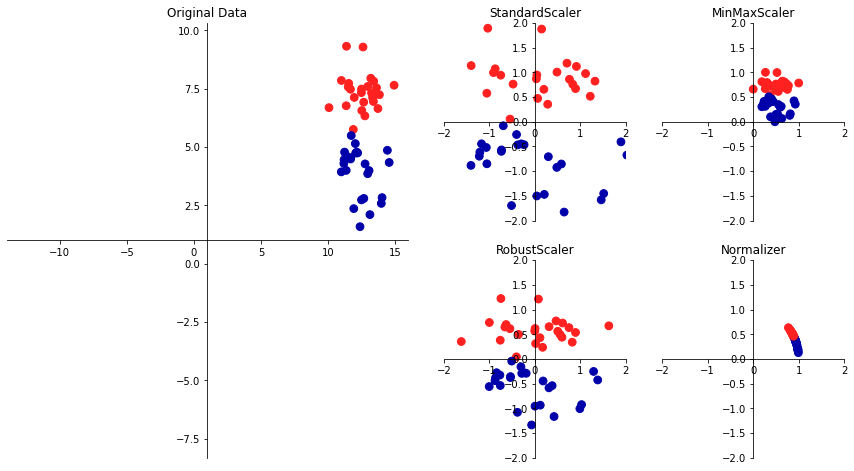

In [ ]:
import mglearn
mglearn.plots.plot_scaling()

The first plot in this figure shows a synthetic two-class classification dataset with two features. The first feature (the x-axis value) is between 10 and 15. The second feature (the y-axis value) is between around 1 and 9.

**The following four plots show four different ways** to transform the data that yield more standard ranges. The **StandardScaler** in scikit-learn ensures that for each feature the mean is 0 and the variance is 1, bringing all features to the same magnitude. However, this scaling does not ensure any particular minimum and maximum values for the features. The **RobustScaler** works similarly to the **StandardScaler** in that it ensures statistical properties for each feature that guarantee that they are on the same scale. However, the **RobustScaler** uses the median and quartiles, instead of mean and variance. (The median of a set of numbers is the number x such that half of the numbers are smaller than x and half of the numbers are larger than x. The lower quartile is the number x such that one-fourth of the numbers are smaller than x, and the upper quartile is the number x such that one-fourth of the numbers are larger than x.)

This makes the **RobustScaler** ignore data points that are very different from the rest (like measurement errors). These odd data points are also called **outliers**, and can lead to trouble for other scaling techniques. The **MinMaxScaler**, on the other hand, shifts the data such that all features are exactly between 0 and 1. For the two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0 and 1 and the y-axis between 0 and 1.

Finally, the **Normalizer** does a very different kind of rescaling. It scales each data point such that the feature vector has a Euclidean length of 1. In other words, it projects a data point on the circle (or sphere, in the case of higher dimensions) with a radius of 1. This means every data point is scaled by a different number (by the inverse of its length). This normalization is often used when only the direction (or angle) of the data matters, not the length of the feature vector.

> **Applying Data Transformations**

Now that we’ve seen what the different kinds of transformations do, let’s apply them using **scikit-learn**. We will use the cancer dataset.

Preprocessing methods like the scalers are usually applied before applying a supervised machine learning algorithm. As an example, say we want to apply the kernel SVM (SVC) to the cancer dataset, and use **MinMaxScaler** for preprocessing the data. We start by loading our dataset and splitting it into a training set and a test set (we need separate training and test sets to evaluate the supervised model):






In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


As a reminder, the dataset contains 569 data points, each represented by 30 measurements. We split the dataset into 426 samples for the training set and 143 samples for the test set.

As with the supervised models we built earlier, we first import the class that implements the preprocessing, and then instantiate it:



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

We then fit the scaler using the **fit** method, applied to the training data. For the **MinMaxScaler**, the **fit** method computes the minimum and maximum value of each feature on the training set. In contrast to what we had earlier, the scaler is only provided with the data (X_train) when fit is called, and y_train is not used:



In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

To apply the transformation that we just learned—that is, to actually scale the training data—we use the **transform** method of the scaler. The **transform** method is used in **scikit-learn** whenever a model returns a new representation of the data:



In [ ]:
# transform data
X_train_scaled = scaler.transform(X_train)

# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


The transformed data has the same shape as the original data—the features are simply shifted and scaled. You can see that all of the features are now between 0 and 1, as desired.

To apply the SVM to the scaled data, we also need to transform the test set. This is again done by calling the transform method, this time on X_test:



In [ ]:
# transform test data
X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


Maybe somewhat surprisingly, you can see that for the test set, after scaling, the minimum and maximum are not 0 and 1. Some of the features are even outside the 0–1 range! The explanation is that the **MinMaxScaler** (and all the other scalers) always applies exactly the **same** transformation to the training and the test set. This means the transform method always subtracts the **training set minimum** and divides by the **training set range**, which might be different from the minimum and range for the test set.

> **Scaling Training and Test Data the Same Way**

It is important to apply exactly the same transformation to the training set and the test set for the supervised model to work on the test set. The following example illustrates what would happen if we were to use the minimum and range of the test set instead:



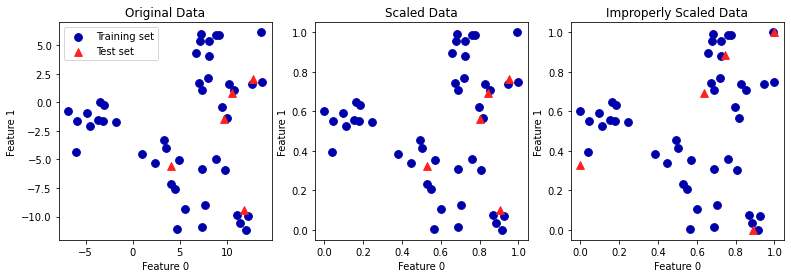

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
color=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
color=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', color=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], color=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', color=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")


**The first panel** is an unscaled two-dimensional dataset, with the training set shown as circles and the test set shown as triangles. **The second panel** is the same data, but scaled using the MinMaxScaler. Here, we called fit on the training set, and then called transform on the training and test sets. You can see that the dataset in the second panel looks identical to the first; only the ticks on the axes have changed. Now all the features are between 0 and 1. You can also see that the minimum and maximum feature values for the test data (the triangles) are not 0 and 1.

**The third panel** shows what would happen if we scaled the training set and test set separately. In this case, the minimum and maximum feature values for both the training and the test set are 0 and 1. But now the dataset looks different. The test points moved incongruously to the training set, as they were scaled differently. We changed the arrangement of the data in an arbitrary way. Clearly this is not what we want to do.

> **2. Dimensionality Reduction, Feature Extraction, and Manifold Learning**

As we discussed earlier, transforming data using unsupervised learning can have many motivations. The most common motivations are visualization, compressing the data, and finding a representation that is more informative for further processing. One of the simplest and most widely used algorithms for all of these is **principal component analysis**. We’ll also look at two other algorithms: **non-negative matrix factorization** (NMF), which is commonly used for feature extraction, and **t-SNE**, which is commonly used for visualization using two-dimensional scatter plots.

> **Principal Component Analysis (PCA)**

Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data. The following example illustrates the effect of PCA on a synthetic two-dimensional dataset:






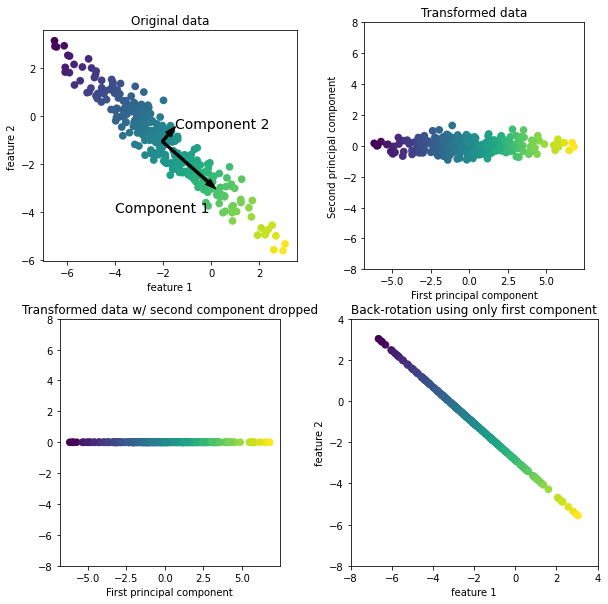

In [ ]:
mglearn.plots.plot_pca_illustration()

The first plot (top left) shows the original data points, colored to distinguish among them. The algorithm proceeds by first finding the direction of maximum variance, labeled “Component 1.” This is the direction (or vector) in the data that contains most of the information, or in other words, the direction along which the features are most correlated with each other.

Then, the algorithm finds the direction that contains the most information while being orthogonal to the first direction. In two dimensions, there is only one possible orientation that is at a right angle, but in higher-dimensional spaces there would be (infinitely) many orthogonal directions.

The directions found in such a way are called **principal components**.

The second plot (top right) shows the same data, but now rotated so that the first principal component coincides with the x-axis, and the second principal component coincides with the y-axis. The average is subtracted from each data value before rotation, thus, the converted data is centered around zero.

We can use PCA to downsize while keeping only a few main components. In this example, we can leave only the first principal component as shown in the third plot (bottom left). This will reduce the dimension of the data: from a two-dimensional data array, we obtain a one-dimensional data array. However, it should be noted that instead of leaving only one of the initial features, we find the most interesting direction and leave it, i.e. the first main component.

Finally, we can undo the rotation and add back the mean value to data values. As a result, we get the data shown on the last plot. These points are located in space of initial feauteres, but we have left only the information contained in the first main component. This transformation is sometimes used, to remove the noise effect from the data or show which part information is retained when using principal components.

> **Applying PCA to the cancer dataset for visualization**

**One of the most common applications of PCA** is visualizing high-dimensional datasets. As we saw earlier, it is hard to create scatter plots of data that has more than two features. For the Iris dataset, we were able to create a pair plot that gave us a partial picture of the data by showing us all the possible combinations of two features. But if we want to look at the Breast Cancer dataset, even using a pair plot is tricky. This dataset has 30 features, which would result in 30 * 14 = 420 scatter plots! We’d never be able to look at all these plots in detail, let alone try to understand them.

Using PCA, we can find the first two principal components, and visualize the data in this new two-dimensional space with a single scatter plot. Before we apply PCA, we scale our data so that each feature has unit variance using **StandardScaler**:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Learning the PCA transformation and applying it is as simple as applying a preprocessing transformation. We instantiate the PCA object, find the principal components by calling the fit method, and then apply the rotation and dimensionality reduction by calling **transform**. By default, PCA only rotates (and shifts) the data, but keeps all principal components. To reduce the dimensionality of the data, we need to specify how many components we want to keep when creating the PCA object:



In [ ]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)

# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


We can now plot the first two principal components:



Text(0, 0.5, 'Second principal component')

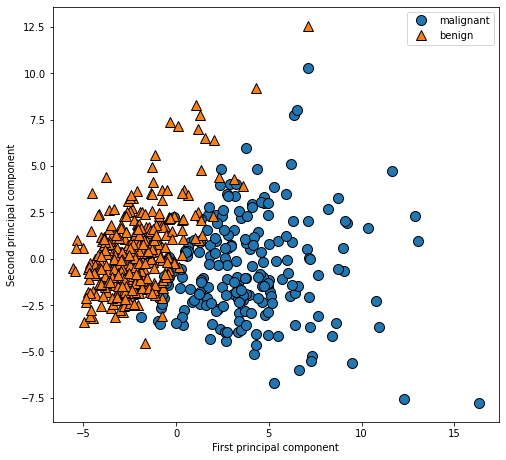

In [ ]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

It is important to note that **PCA is an unsupervised method**, and does not use any class information when finding the rotation. It simply looks at the correlations in the data. For the scatter plot shown here, we plotted the first principal component against the second principal component, and then used the class information to color the points.

You can see that the two classes separate quite well in this two-dimensional space. This leads us to believe that even a linear classifier (that would learn a line in this space) could do a reasonably good job at distinguishing the two classes. We can also see that the malignant (blue) points are more spread out than the benign (orange) points.

**A downside of PCA** is that the two axes in the plot are often not very easy to interpret. The principal components correspond to directions in the original data, so they are combinations of the original features. However, these combinations are usually very complex, as we’ll see shortly. The principal components themselves are stored in the **components_** attribute of the PCA object during fitting:

In [ ]:
print("PCA component shape: {}".format(pca.components_.shape))


PCA component shape: (2, 30)


Each row in **components_** corresponds to one principal component, and they are sorted by their importance (the first principal component comes first, etc.). The columns correspond to the original features attribute of the PCA in this example, “mean radius,” “mean texture,” and so on. Let’s have a look at the content of **components_**:

In [ ]:
print("PCA components:\n{}".format(pca.components_))


PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


We can also visualize the coefficients using a heat map, which might be easier to understand:



Text(0, 0.5, 'Principal components')

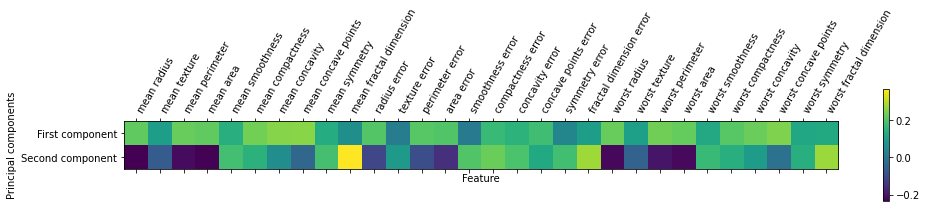

In [ ]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

You can see that in the first component, all features have the same sign. That means that there is a general correlation between all features. As one measurement is high, the others are likely to be high as well. The second component has mixed signs, and both of the components involve all of the 30 features.



> **Eigenfaces for feature extraction**

**Another application of PCA** that we mentioned earlier is feature extraction. The idea behind feature extraction is that it is possible to find a representation of your data that is better suited to analysis than the raw representation you were given. **A great example of an application where feature extraction is helpful is with images.** Images are made up of pixels, usually stored as red, green, and blue (RGB) intensities. Objects in images are usually made up of thousands of pixels, and only together are they meaningful.

We will give a very simple application of feature extraction on images using PCA, by working with face images from the Labeled Faces in the **Wild dataset**. This dataset contains face images of celebrities downloaded from the Internet, and it includes faces of politicians, singers, actors, and athletes from the early 2000s. We use grayscale versions of these images, and scale them down for faster processing. You can see some of the images in the figure:

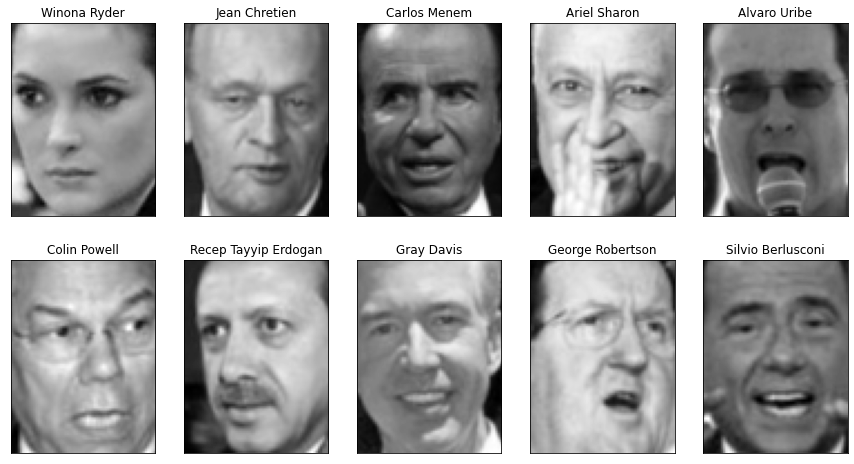

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_title(people.target_names[target])

There are 2,537 images, each 87×65 pixels large, belonging to 45 different people:



In [ ]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


**The dataset is a bit skewed**, however, containing a lot of images of George W. Bush and Colin Powell, as you can see here:



In [ ]:
import numpy as np 

#count how often each target appears
counts = np.bincount(people.target)

# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

To make the data less skewed, we will only take up to 50 images of each person (otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush):



In [ ]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

**A common task in face recognition** is to ask if a previously unseen face belongs to a known person from a database. **This has applications in photo collection, social media, and security applications.** *One way to solve this problem would be to build a classifier where each person is a separate class.* However, there are usually many different people in face databases, and very few images of the same person (i.e., very few training examples per class). That makes it hard to train most classifiers. Additionally, you often want to be able to add new people easily, without needing to retrain a large model.

**A simple solution is to use a one-nearest-neighbor classifier** that looks for the most similar face image to the face you are classifying. This classifier could in principle work with only a single training example per class. Let’s take a look at how well KNeighborsClassifier does here:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


**We obtain an accuracy of 28%**, which is not actually that bad for a 45-class classification problem (random guessing would give you around 1/45 = 2.2% accuracy), but is also not great. We only correctly identify a person every fourth time.

This is where PCA comes in. **Computing distances in the original pixel space is quite a bad way to measure similarity between faces.** When using a pixel representation to compare two images, we compare the grayscale value of each individual pixel to the value of the pixel in the corresponding position in the other image. *This representation is quite different from how humans would interpret the image of a face, and it is hard to capture the facial features using this raw representation.* For example, using pixel distances means that shifting a face by one pixel to the right corresponds to a drastic change, with a completely different representation. **We hope that using distances along principal components can improve our accuracy.**

We fit the PCA object to the training data and extract the first 100 principal components. Then we transform the training and test data:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


The new data has 100 features, the first 100 principal components. Now, we can use the new representation to classify our images using a one-nearest-neighbors classifier:



In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


Our accuracy improved quite significantly, from 28% to 34%, confirming our intuition that the principal components might provide a better representation of the data.

**For image data, we can also easily visualize the principal components that are found.** Remember that components correspond to directions in the input space. The input space here is 87×65-pixel grayscale images, so directions within this space are also 87×65=5655-pixel grayscale images.

Let’s look at the first couple of principal components:

In [ ]:
print("pca.components_.shape: {}".format(pca.components_.shape))


pca.components_.shape: (100, 5655)


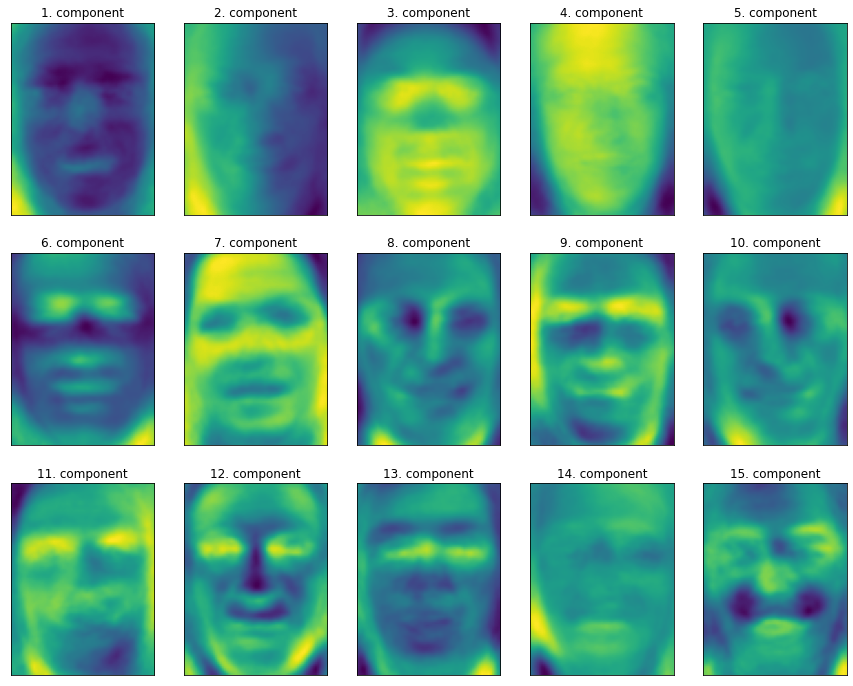

In [ ]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

While we certainly cannot understand all aspects of these components, we can guess which aspects of the face images some of the components are capturing. **The first component seems to mostly encode the contrast between the face and the background**, the second component encodes differences in lighting between the right and the left half of the face, and so on.

This representation is quite far from how a human might perceive a face. As the PCA model is based on pixels, the alignment of the face (the position of eyes, chin, and nose) and the lighting both have a strong influence on how similar two images are in their pixel representation. But alignment and lighting are probably not what a human would perceive first. When asking people to rate similarity of faces, they are more likely to use attributes like age, gender, facial expression, and hair style, which are attributes that are hard to infer from the pixel intensities. **It’s important to keep in mind that algorithms often interpret data (particularly visual data, such as images, which humans are very familiar with) quite differently from how a human would.**

Let’s come back to the specific case of PCA, though. We introduced the PCA transformation as rotating the data and then dropping the components with low variance. Another useful interpretation is to try to find some numbers (the new feature values after the PCA rotation) so that we can express the test points as a weighted sum of the principal components:

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.ibb.co/S6k2tDR/4.png")

Here, $x_0$, $x_1$, and so on are the coefficients of the principal components for this data point; in other words, they are the representation of the image in the rotated space.

**Another way we can try to understand what a PCA model is doing is by looking at the reconstructions of the original data using only some components.** Here, we visualize the reconstruction of some faces using 10, 50, 100, 500, or 2,000 components.

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 6.3s, 0.1min


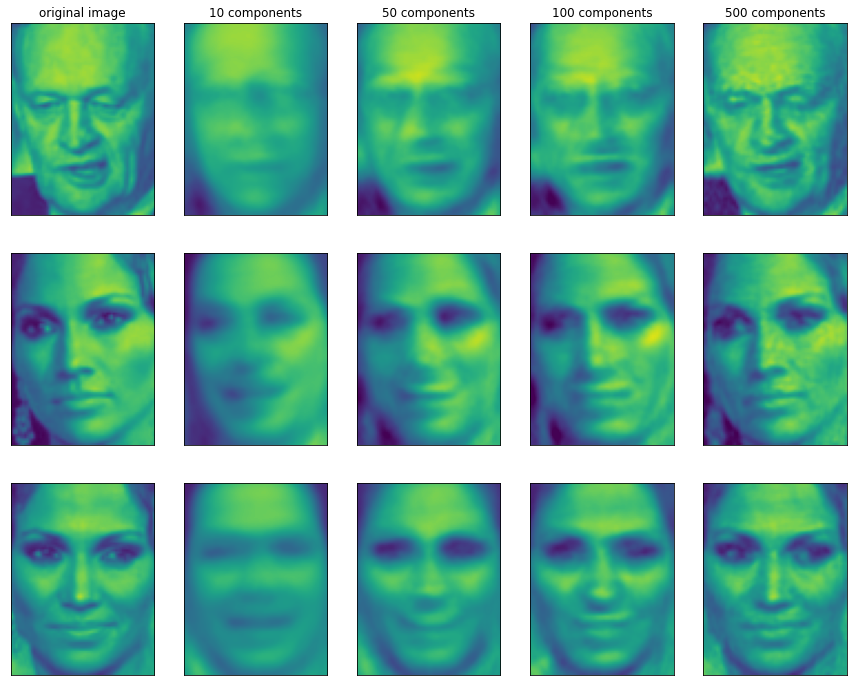

In [ ]:
import mglearn
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

**You can see that when we use only the first 10 principal components, only the essence of the picture, like the face orientation and lighting, is captured.** By using more and more principal components, more and more details in the image are preserved. This corresponds to extending the sum to include more and more terms. *Using as many components as there are pixels* would mean that we would not discard any information, and we would reconstruct the image perfectly.